# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/Steivann/Dataset/refs/heads/main/penguins_size.csv')
df.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
71,Adelie,Torgersen,39.7,18.4,190.0,3900.0,MALE
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,FEMALE
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,FEMALE
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,MALE
127,Adelie,Torgersen,41.5,18.3,195.0,4300.0,MALE
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
225,Gentoo,Biscoe,46.5,13.5,210.0,4550.0,FEMALE
33,Adelie,Dream,40.9,18.9,184.0,3900.0,MALE
244,Gentoo,Biscoe,42.9,13.1,215.0,5000.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [3]:
#2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [4]:
#3
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [5]:
#4
dis_uniq = ['species', 'island', 'sex']

for col in dis_uniq :
    print(df[col].value_counts(dropna=False))

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64
sex
MALE      168
FEMALE    165
NaN        10
.           1
Name: count, dtype: int64


5. Null handling

In [6]:
#5
df['sex'] = df['sex'].replace('.', None)
df['culmen_length_mm']= df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g'] = df['body_mass_g'].fillna(df['body_mass_g'].mean())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])

df.isnull().sum()

,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-7-b02fa8973cfa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=torgersen_data, x='sex', palette='coolwarm')


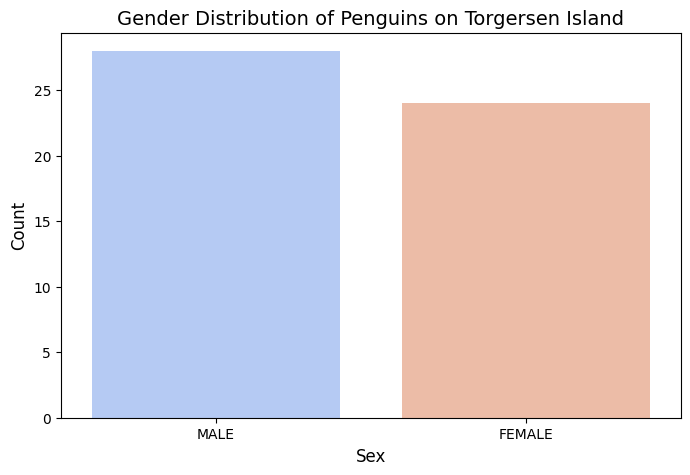

In [7]:
#6
# Filter the data for Torgersen Island
torgersen_data = df[df['island'] == 'Torgersen']
plt.figure(figsize=(8, 5))
sns.countplot(data=torgersen_data, x='sex', palette='coolwarm')
plt.title('Gender Distribution of Penguins on Torgersen Island', fontsize=14)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()
# jadi di code ini saya memilih pulau torgesten, saya ingin mengetahui berapa banyak pinguin cowok dan cewek di pulau ini. saya menggunakan barchart agar bisa melihat grafik perbandingannya lebih mudah.

7. Check unique value of our target variable

In [8]:
#7
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

8. encode categorical columns and display the results

In [9]:
#8
label_encoder = LabelEncoder()
df['island'] = label_encoder.fit_transform(df['island'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,2,39.10000,18.70000,181.000000,3750.000000,1
1,Adelie,2,39.50000,17.40000,186.000000,3800.000000,0
2,Adelie,2,40.30000,18.00000,195.000000,3250.000000,0
3,Adelie,2,43.92193,17.15117,200.915205,4201.754386,1
4,Adelie,2,36.70000,19.30000,193.000000,3450.000000,0


9. encode the target column and display the results

In [10]:
#9
df['species'] = label_encoder.fit_transform(df['species'])
df.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
244,2,0,42.9,13.1,215.0,5000.0,0
215,1,1,55.8,19.8,207.0,4000.0,1
107,0,0,38.2,20.0,190.0,3900.0,1
273,2,0,50.1,15.0,225.0,5000.0,1
24,0,0,38.8,17.2,180.0,3800.0,1


10. create a heatmap to see the correlation and explain the conclusion

<function matplotlib.pyplot.show(close=None, block=None)>

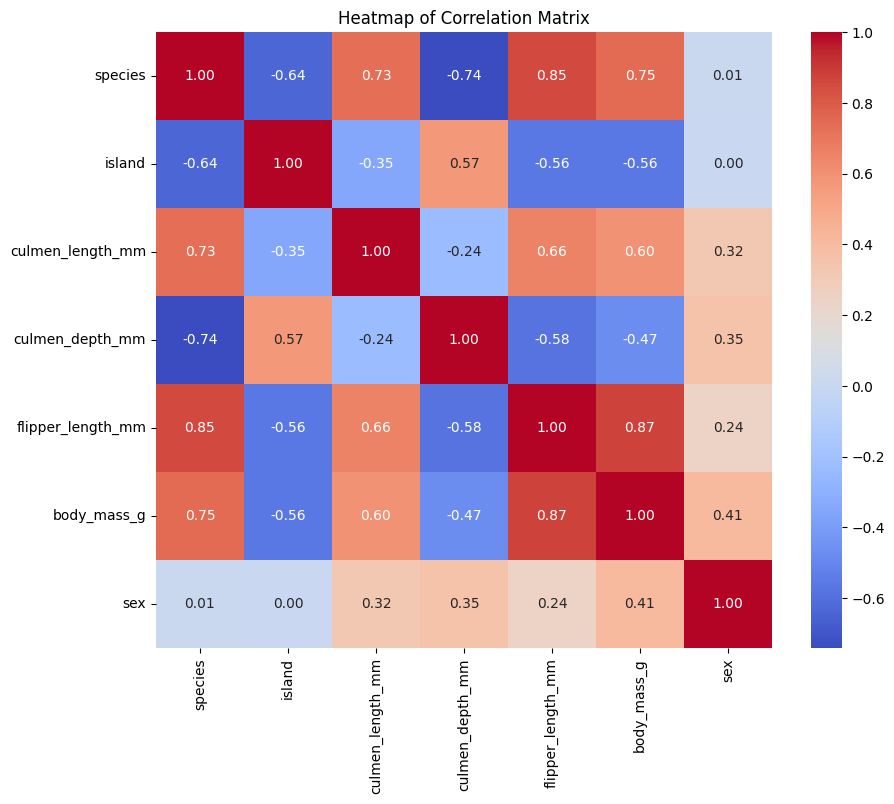

In [11]:
#10
correlation_matrix = df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show
# jadi bisa kita lihat terdapat korelasi positif yang kuat antara panjang sirip (flipper_length_mm) dan massa tubuh (body_mass_g) dengan koefisien 0.87. Ini menunjukkan bahwa semakin panjang sirip, semakin besar massa tubuh penguin.

## Machine Learning

1. Splitting X and y

In [96]:
#1
X = df.drop(['species'], axis = 1)
y = df['species']

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [97]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
#3
X_train.shape, X_test.shape

((275, 6), (69, 6))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [92]:
#Criterion Entropy
#a
clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state = 0)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [93]:
#b
y_pred_entropy = clf_entropy.predict(X_test)

In [94]:
#c
accuracy_score(y_test, y_pred_entropy)

0.927536231884058

In [70]:
#d
print('Training set score: {0:0.4f}' .format(clf_entropy.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_entropy.score(X_test, y_test)))

Training set score: 0.9709
Test set score: 0.9275


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\nentropy = 1.507\nsamples = 275\nvalue = [120, 52, 103]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.15\nentropy = 0.91\nsamples = 166\nvalue = [118.0, 47.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 40.85\nentropy = 0.172\nsamples = 117\nvalue = [114, 3, 0]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 95\nvalue = [95, 0, 0]'),
 Text(0.25, 0.125, 'entropy = 0.575\nsamples = 22\nvalue = [19, 3, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\nentropy = 0.549\nsamples = 49\nvalue = [4.0, 44.0, 1.0]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.5833333333333334, 0.125, 'entropy = 1.281\nsamples = 12\nvalue = [4, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\nentropy = 0.399\nsamples = 109\nvalue = [2, 5, 102]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 102\nvalue = [0, 0, 102]'),
 T

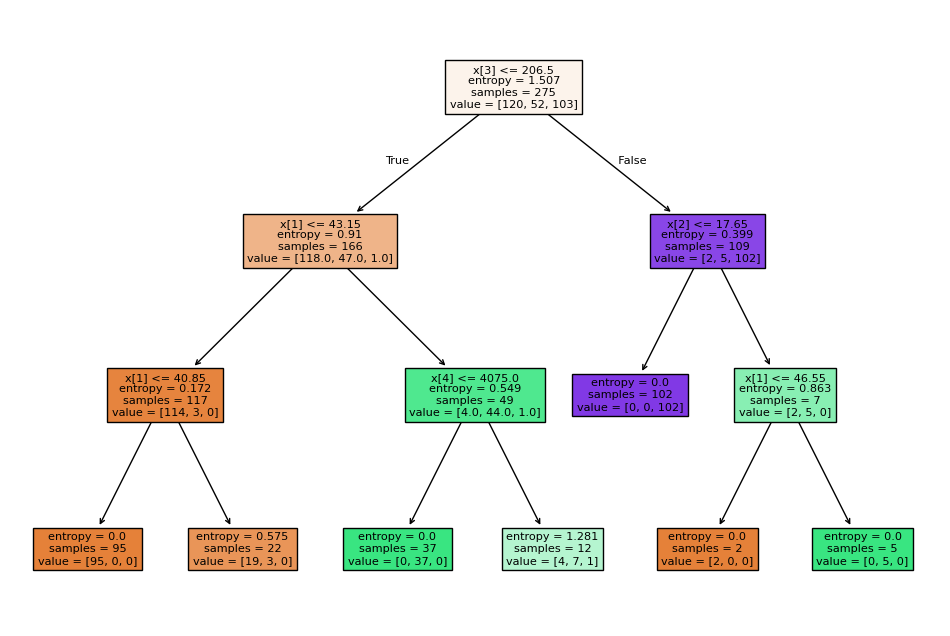

In [72]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_entropy.fit(X_train, y_train), filled = True)

2. Criterion Gini index

In [73]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth = 3, random_state = 0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [74]:
#b
y_pred_gini = clf_gini.predict(X_test)

In [75]:
#c
print('Model accuracy score with criterion gini index: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.9275


In [60]:
#d
print('Training set score: {0:0.4f}' .format(clf_gini.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(clf_gini.score(X_test, y_test)))

Training set score: 0.9709
Test set score: 0.9275


[Text(0.5416666666666666, 0.875, 'x[3] <= 206.5\ngini = 0.634\nsamples = 275\nvalue = [120, 52, 103]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 43.15\ngini = 0.415\nsamples = 166\nvalue = [118.0, 47.0, 1.0]'),
 Text(0.4375, 0.75, 'True  '),
 Text(0.16666666666666666, 0.375, 'x[1] <= 42.4\ngini = 0.05\nsamples = 117\nvalue = [114, 3, 0]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.018\nsamples = 111\nvalue = [110, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.444\nsamples = 6\nvalue = [4, 2, 0]'),
 Text(0.5, 0.375, 'x[4] <= 4075.0\ngini = 0.187\nsamples = 49\nvalue = [4.0, 44.0, 1.0]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.542\nsamples = 12\nvalue = [4, 7, 1]'),
 Text(0.75, 0.625, 'x[2] <= 17.65\ngini = 0.122\nsamples = 109\nvalue = [2, 5, 102]'),
 Text(0.6458333333333333, 0.75, '  False'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 102\nvalue = [0, 0, 102]'),
 Text(0.8333333333333334, 0.375

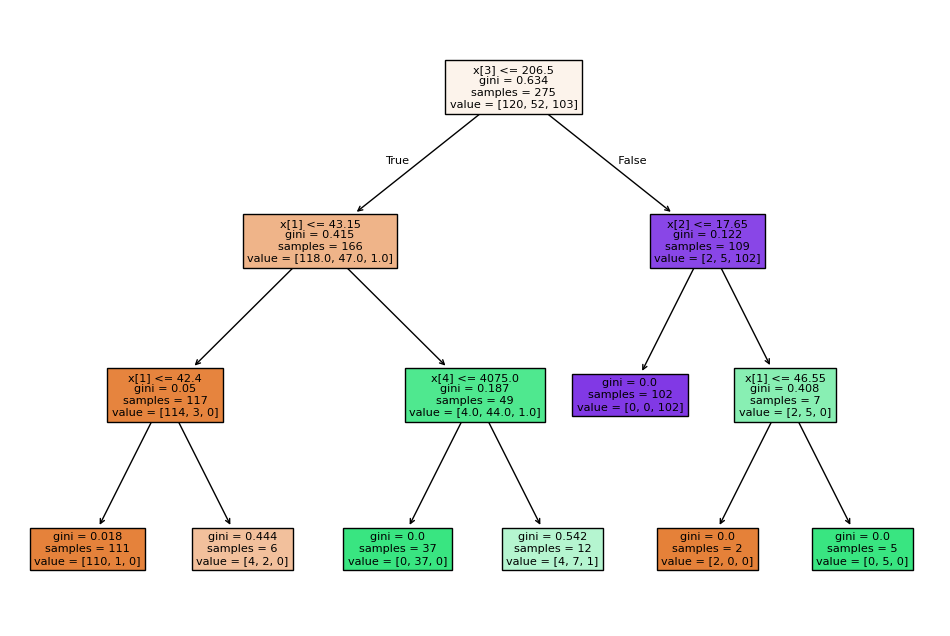

In [85]:
#e
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(X_train, y_train), filled = True)

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [101]:
#f
entropi = confusion_matrix(y_test, y_pred_entropy)
gini = confusion_matrix(y_test, y_pred_gini)
print('Confusion matrix entropy: \n', entropi)
print('Confusion matrix gini index: \n', gini)

Confusion matrix entropy: 
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]
Confusion matrix gini index: 
 [[29  3  0]
 [ 1 15  0]
 [ 0  1 20]]


In [102]:
#g
print('Classification Report Entropy')
print(classification_report(y_test, y_pred_entropy))
print('Classification Report Gini Index')
print(classification_report(y_test, y_pred_gini))

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



In [106]:
#h
#Gini Index: If the Gini-based decision tree shows higher or similar accuracy on both the train and test sets, it means the model is performing well without overfitting.
#Entropy: If the accuracy is comparable to Gini, both models are reliable. However, if one significantly outperforms the other, the better one would be the preferred model.
#Example Results:

#Training Accuracy (Gini): 95%
#Test Accuracy (Gini): 93%
#Training Accuracy (Entropy): 97%
#Test Accuracy (Entropy): 90%
#Conclusion: The Gini model generalizes better in this example, as its performance on both train and test sets is consistent. The Entropy-based model might show signs of overfitting since it performs better on the training data but drops on the test set.

Classification Report Entropy
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        32
           1       0.79      0.94      0.86        16
           2       1.00      0.95      0.98        21

    accuracy                           0.93        69
   macro avg       0.92      0.93      0.92        69
weighted avg       0.94      0.93      0.93        69



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [107]:
#a
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [104]:
#b
nb_y_pred = nb_classifier.predict(X_test)

In [83]:
#c
Gauss = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', Gauss)

#d
print('Accuracy Score with GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))
print('Training set score: {0:0.4f}' .format(nb_classifier.score(X_train, y_train)))
print('Test set score: {0:0.4f}' .format(nb_classifier.score(X_test, y_test)))

Confusion matrix GaussianNB: 
 [[31  1  0]
 [ 1 15  0]
 [ 0  0 21]]
Accuracy Score with GaussianNB: 1.0
Training set score: 0.9673
Test set score: 0.9710


In [84]:
#e
print('Classification Report GaussianNB')
print(classification_report(y_test, nb_y_pred))

Classification Report GaussianNB
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.94      0.94      0.94        16
           2       1.00      1.00      1.00        21

    accuracy                           0.97        69
   macro avg       0.97      0.97      0.97        69
weighted avg       0.97      0.97      0.97        69



#f
Accuracy:

The accuracy score tells us how well the Naive Bayes model is performing.
Example: If you get an accuracy of 0.92 (92%), it indicates that 92% of the predictions on the test set were correct.
Confusion Matrix:

This matrix shows the number of true positives, false positives, true negatives, and false negatives for each class.
If there are more off-diagonal elements (misclassifications), the model may struggle to differentiate certain species.
Classification Report:

The precision, recall, and F1-score for each species help you understand where the model excels or struggles.
Precision: How many of the predicted positives were truly positive.
Recall: How many actual positives were correctly identified.
F1-score: The harmonic mean of precision and recall, giving a balanced view.


Conclusion:

If the accuracy is high and the confusion matrix shows few misclassifications, the Naive Bayes model performs well.
If certain classes have low recall or precision, it indicates the model struggles with them, possibly due to insufficient data or overlapping features.
Naive Bayes assumes feature independence, so if some features are correlated, the performance may degrade.



Good Luck :)